## Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cv2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import csv
import datetime
from sklearn.metrics import accuracy_score 

## Train Data

In [2]:
train_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\train.csv", parse_dates=['first_active_month'])
feature1 = train_data['feature_1']
feature2 = train_data['feature_2']
feature3 = train_data['feature_3']
target = train_data['target']
first_active_month = train_data['first_active_month']
train_data.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749
5,2016-09-01,C_ID_0894217f2f,4,2,0,0.871585
6,2016-12-01,C_ID_7e63323c00,3,2,1,0.230129
7,2017-09-01,C_ID_dfa21fc124,3,2,1,2.135850
8,2017-08-01,C_ID_fe0fdac8ea,2,1,0,-0.065406
9,2016-08-01,C_ID_bf62c0b49d,2,2,0,0.300062


In [5]:
test_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\test.csv", parse_dates=['first_active_month'])

## Plotting Graphs

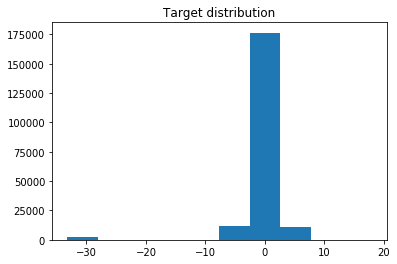

In [3]:
plt.hist(train_data['target']);
plt.title('Target distribution');

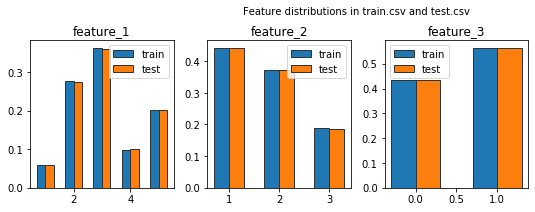

In [6]:
plt.figure(figsize=[10,5])
plt.suptitle('Feature distributions in train.csv and test.csv', fontsize=10, y=1.02)
for num, col in enumerate(['feature_1', 'feature_2', 'feature_3']):
    plt.subplot(2, 4, num+1)
    if col is not 'target':
        v_c = train_data[col].value_counts() / train_data.shape[0]
        plt.bar(v_c.index, v_c, label=('train'), align='edge', width=-0.3, edgecolor=[0.2]*3)
        v_c = test_data[col].value_counts() / test_data.shape[0]
        plt.bar(v_c.index, v_c, label=('test'), align='edge', width=0.3, edgecolor=[0.2]*3)
        plt.title(col)
        plt.legend()
    plt.tight_layout()
plt.tight_layout()
plt.show()

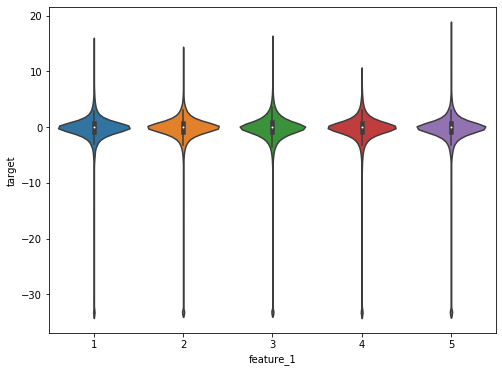

In [4]:
fig, ax = plt.subplots(figsize =(8, 6)) 
sns.violinplot(ax = ax, x = feature1, y = target)

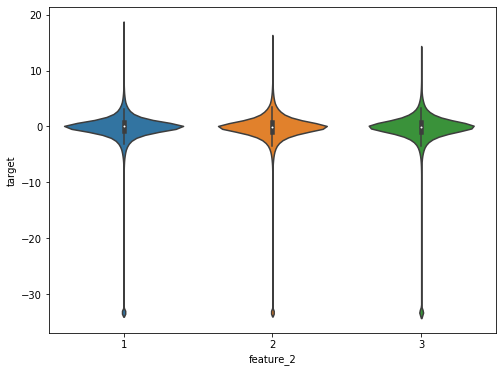

In [5]:
fig, ax = plt.subplots(figsize =(8, 6)) 
sns.violinplot(ax = ax, x = feature2, y = target)

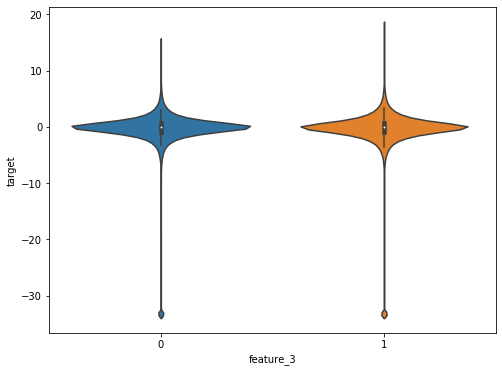

In [6]:
fig, ax = plt.subplots(figsize =(8, 6)) 
sns.violinplot(ax = ax, x = feature3, y = target)

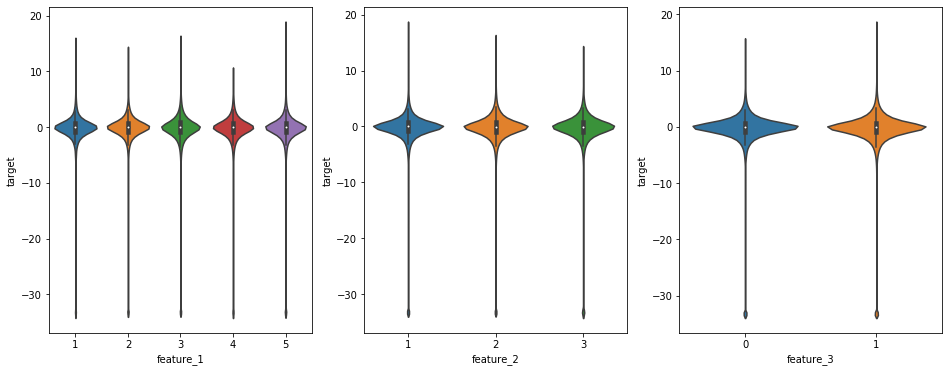

In [7]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
sns.violinplot(ax = ax[0], x = feature1, y = target)
sns.violinplot(ax = ax[1], x = feature2, y = target)
sns.violinplot(ax = ax[2], x = feature3, y = target)

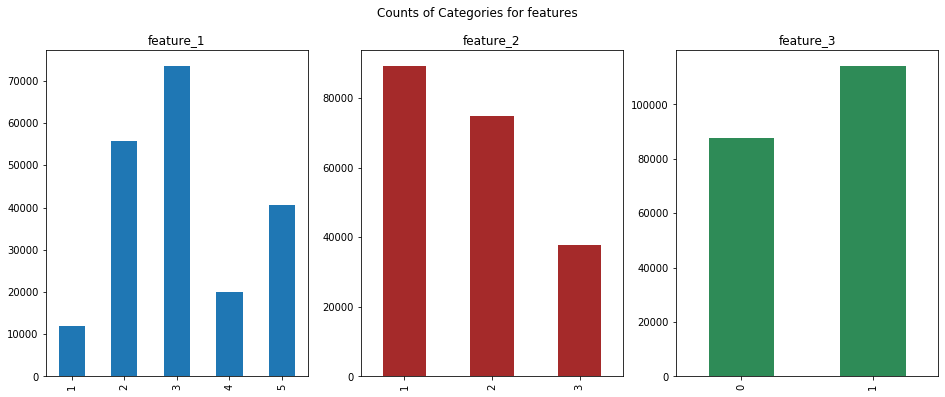

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
train_data['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], title='feature_1')
train_data['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2')
train_data['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='seagreen', title='feature_3')
plt.suptitle('Counts of Categories for features');

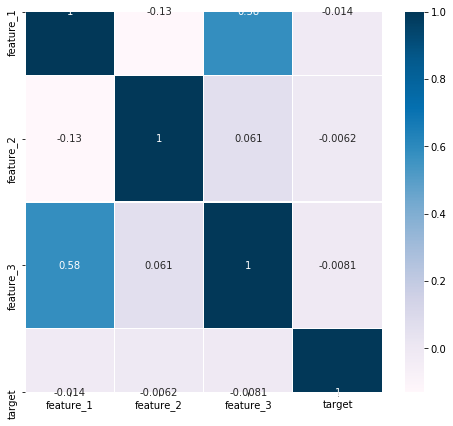

In [9]:
def heat_map(train_data):
    
    Correlation_Matrix = train_data.corr()
    f, ax = plt.subplots(figsize =(8, 7)) 

    sns.heatmap(Correlation_Matrix, 
                ax = ax, 
                cmap ="PuBu",
                linewidths = 0.1,
                annot = True,
                annot_kws = {"size": 10}
               )
    ax.set_yticklabels(Correlation_Matrix.columns)
    ax.set_xticklabels(Correlation_Matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

heat_map(train_data)

In [11]:
def select_KBest(train_data):
    
    columns = len(train_data.columns)
    
    X = train_data.iloc[:, 2:columns - 1 ] 
    print(X.columns)
    Y = train_data.iloc[:,-1]
    Y = Y.astype('int')
    
    Features = SelectKBest(score_func = chi2, k = 2)
    model = Features.fit(X,Y)
    
    dfscores = pd.DataFrame(model.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    
    featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
    featureScores.columns = ['Feature','Score']  
    x = featureScores.nlargest(2,'Score')
    print(x)
    
select_KBest(train_data)

Index(['feature_1', 'feature_2', 'feature_3'], dtype='object')
     Feature       Score
2  feature_3  176.175979
1  feature_2   57.546750


In [12]:
target = train_data['target'].to_list()
train_data.drop(["target"], axis = 1, inplace = True)
max_date = train_data['first_active_month'].dt.date.max()
#print(max_date)

active_days = []
days = list(max_date - train_data['first_active_month'].dt.date)
for values in days:
    
    value = str(values)
    data = value.split(" ")
    active_days.append(int(data[0]))

train_data['active_days'] = active_days
train_data['feature_sum'] = train_data['feature_1'] + train_data['feature_2'] + train_data['feature_3']
train_data['feature_mean'] = train_data['feature_sum']/3
train_data['feature_max'] = train_data[['feature_1', 'feature_2', 'feature_3']].max(axis=1)
train_data['feature_min'] = train_data[['feature_1', 'feature_2', 'feature_3']].min(axis=1)
train_data['feature_var'] = train_data[['feature_1', 'feature_2', 'feature_3']].std(axis=1)
train_data['quarter'] = (train_data['first_active_month'].dt.quarter)
train_data['target'] = target

In [13]:
print(train_data.columns)

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'active_days', 'feature_sum', 'feature_mean', 'feature_max',
       'feature_min', 'feature_var', 'quarter', 'target'],
      dtype='object')


In [14]:
train_data.to_csv("D:/SML/elo-merchant-category-recommendation/updated_train_data.csv", index = False)

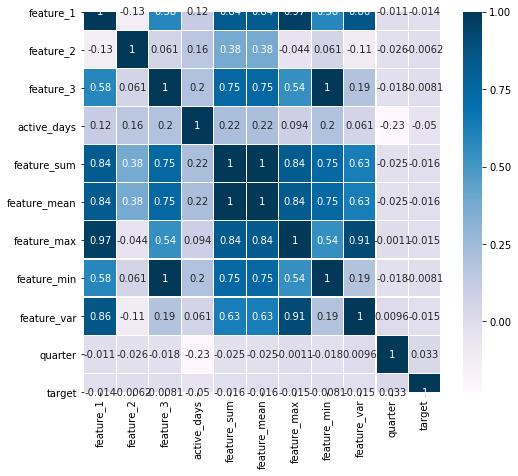

In [15]:
def updated_heat_map(train_data):
    
    Correlation_Matrix = train_data.corr()
    f, ax = plt.subplots(figsize =(8, 7)) 

    sns.heatmap(Correlation_Matrix, 
                ax = ax, 
                cmap ="PuBu",
                linewidths = 0.1,
                annot = True,
                annot_kws = {"size": 10}
               )
    ax.set_yticklabels(Correlation_Matrix.columns)
    ax.set_xticklabels(Correlation_Matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

updated_heat_map(train_data)

## Merchant Data

In [16]:
merchant_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\merchants.csv")
merchant_data.head(5)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [5]:
merchant_data.shape

(334696, 22)

In [4]:
merchant_data.nunique()

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
numerical_1                       954
numerical_2                       947
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
avg_sales_lag3                   3372
avg_purchases_lag3             100003
active_months_lag3                  3
avg_sales_lag6                   4507
avg_purchases_lag6             135202
active_months_lag6                  6
avg_sales_lag12                  5009
avg_purchases_lag12            172917
active_months_lag12                12
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64

In [21]:
merchant_data.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

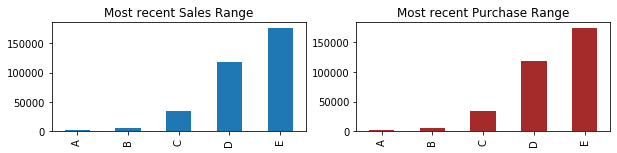

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3));
merchant_data['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[0], title='Most recent Sales Range')
merchant_data['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='Most recent Purchase Range')

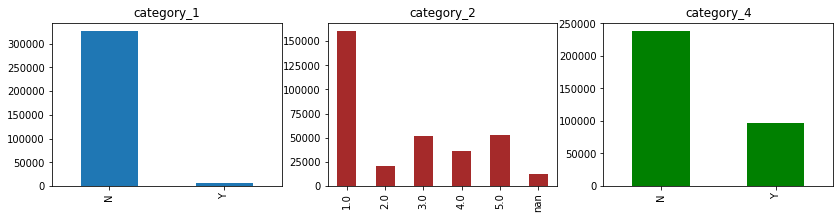

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (14,3));
merchant_data['category_1'].value_counts(dropna=False).sort_index().plot(kind='bar', ax=ax[0], title='category_1')
merchant_data['category_2'].value_counts(dropna=False).sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_2')
merchant_data['category_4'].value_counts(dropna=False).sort_index().plot(kind='bar', ax=ax[2], color='green', title='category_4')

In [25]:
mode_value = list(merchant_data['category_2'].mode())
merchant_data['category_2'].fillna(mode_value[0], inplace = True)

merchant_data.loc[merchant_data['category_1'] == "Y", 'category_1'] = 1
merchant_data.loc[merchant_data['category_1'] == "N", 'category_1'] = 0

merchant_data.loc[merchant_data['category_4'] == "Y", 'category_4'] = 1
merchant_data.loc[merchant_data['category_4'] == "N", 'category_4'] = 0

merchant_data.loc[merchant_data['city_id'] == -1, 'city_id'] = 0
merchant_data.loc[merchant_data['state_id'] == -1, 'state_id'] = 0

In [26]:
merchant_data.fillna(0, inplace=True)

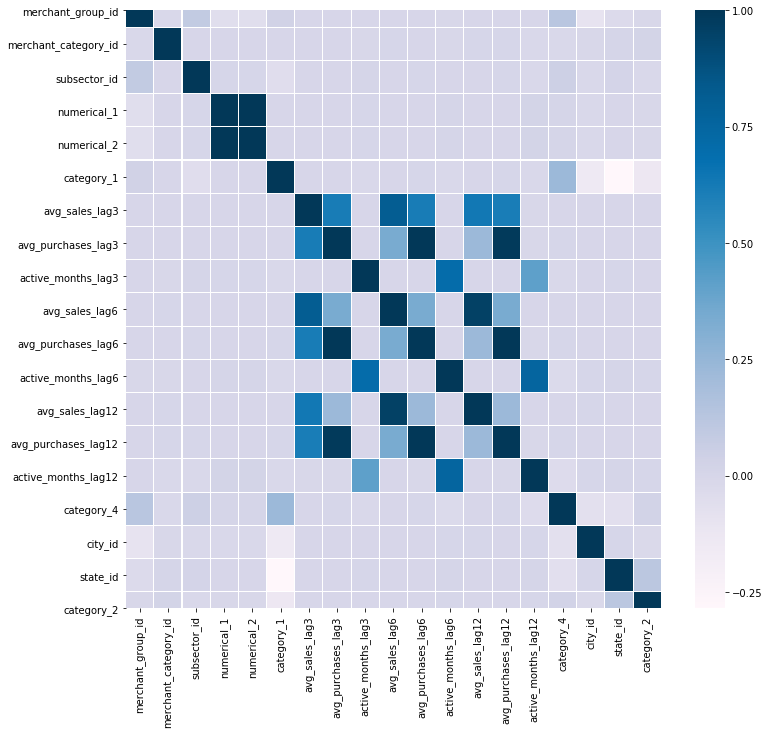

In [24]:
def heat_map(merchant_data):
    
    Correlation_Matrix = merchant_data.corr()
    f, ax = plt.subplots(figsize =(12, 11)) 

    sns.heatmap(Correlation_Matrix, 
                ax = ax, 
                cmap ="PuBu",
                linewidths = 0.1,
                annot_kws = {"size": 10}
               )
    ax.set_yticklabels(Correlation_Matrix.columns)
    ax.set_xticklabels(Correlation_Matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

heat_map(merchant_data)

Text(0.5, 0.98, 'Anonymized numerical values')

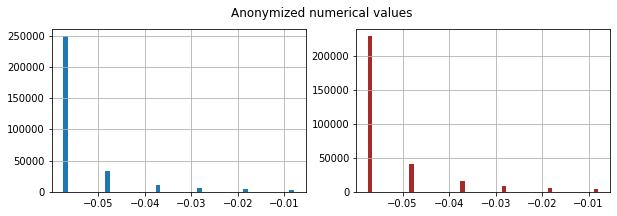

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (10,3));

merchant_data['numerical_2'].loc[merchant_data['numerical_2'] <= 0].hist(bins = 50, ax=ax[0])
merchant_data['numerical_1'].loc[merchant_data['numerical_1'] <= 0].hist(bins = 50, ax=ax[1], color='brown')
plt.suptitle('Anonymized numerical values')

In [10]:
x1 = merchant_data['numerical_2'].loc[merchant_data['numerical_2'] <= 1].count()
x2 = merchant_data['numerical_1'].loc[merchant_data['numerical_1'] <= 1].count()
print(x1/merchant_data.shape[0])
print(x2/merchant_data.shape[0])

0.9895935416019314
0.9893455553696489


Text(0.5, 0.98, 'Average sales')

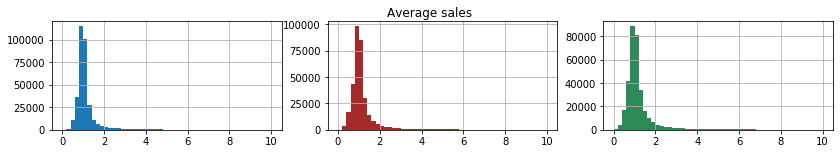

In [66]:
fig, ax = plt.subplots(1, 3, figsize = (14,3));

merchant_data['avg_sales_lag3'].loc[(merchant_data['avg_sales_lag3'] >= 0) & (merchant_data['avg_sales_lag3']<=10)].hist(bins = 50, ax=ax[0])
merchant_data['avg_sales_lag6'].loc[(merchant_data['avg_sales_lag6'] >= 0) & (merchant_data['avg_sales_lag6']<=10)].hist(bins = 50, ax=ax[1], color='brown')
merchant_data['avg_sales_lag12'].loc[(merchant_data['avg_sales_lag12'] >= 0) & (merchant_data['avg_sales_lag12']<=10)].hist(bins = 50, ax=ax[2], color='seagreen')
plt.suptitle('Average sales')

In [14]:
a3 = merchant_data['avg_sales_lag3'].loc[(merchant_data['avg_sales_lag3'] >= 0) & (merchant_data['avg_sales_lag3']<=10)].count()
a6 = merchant_data['avg_sales_lag6'].loc[(merchant_data['avg_sales_lag6'] >= 0) & (merchant_data['avg_sales_lag6']<=10)].count()
a12 = merchant_data['avg_sales_lag12'].loc[(merchant_data['avg_sales_lag12'] >= 0) & (merchant_data['avg_sales_lag12']<=10)].count()
print(a3/merchant_data.shape[0])
print(a6/merchant_data.shape[0])
print(a12/merchant_data.shape[0])


0.989217080574611
0.9827754141071301
0.9794918373688362


Text(0.5, 0.98, 'Average purchases')

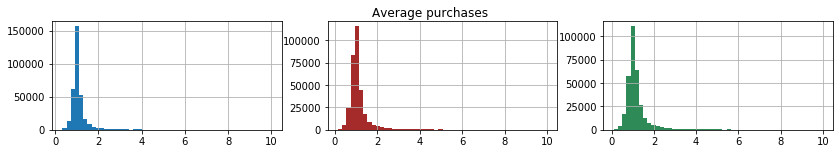

In [67]:
fig, ax = plt.subplots(1, 3, figsize = (14,3));

merchant_data['avg_purchases_lag3'].loc[(merchant_data['avg_purchases_lag3'] >= 0) & (merchant_data['avg_purchases_lag3']<=10)].hist(bins = 50, ax=ax[0])
merchant_data['avg_purchases_lag6'].loc[(merchant_data['avg_purchases_lag6'] >= 0) & (merchant_data['avg_purchases_lag6']<=10)].hist(bins = 50, ax=ax[1], color='brown')
merchant_data['avg_purchases_lag12'].loc[(merchant_data['avg_purchases_lag12'] >= 0) & (merchant_data['avg_purchases_lag12']<=10)].hist(bins = 50, ax=ax[2], color='seagreen')
plt.suptitle('Average purchases')

In [13]:
b3 = merchant_data['avg_purchases_lag3'].loc[(merchant_data['avg_purchases_lag3'] >= 0) & (merchant_data['avg_purchases_lag3']<=10)].count()
b6 = merchant_data['avg_purchases_lag6'].loc[(merchant_data['avg_purchases_lag6'] >= 0) & (merchant_data['avg_purchases_lag6']<=10)].count()
b12 = merchant_data['avg_purchases_lag12'].loc[(merchant_data['avg_purchases_lag12'] >= 0) & (merchant_data['avg_purchases_lag12']<=10)].count()
print(b3/merchant_data.shape[0])
print(b6/merchant_data.shape[0])
print(b12/merchant_data.shape[0])


0.9929428496307097
0.987481176948634
0.9844067452255181


In [33]:
merchant_data.to_csv("D:/SML/elo-merchant-category-recommendation/Final_Data/updated_merchant.csv")

## New Merchant Data

In [19]:
new_merchant_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\new_merchant_transactions.csv")
new_merchant_data.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [37]:
print("Number of rows and columns in new_merchant_transaction", new_merchant_data.shape)
new_merchant_data.nunique()

Number of rows and columns in new_merchant_transaction (1963031, 14)


authorized_flag               1
card_id                  290001
city_id                     308
category_1                    2
installments                 15
category_3                    3
merchant_category_id        314
merchant_id              226129
month_lag                     2
purchase_amount           75190
purchase_date           1667025
category_2                    5
state_id                     25
subsector_id                 41
dtype: int64

In [38]:
print("Number of null values in each column")
print(new_merchant_data.isnull().sum())

Number of null values in each column
authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64


In [40]:
print(new_merchant_data['authorized_flag'].value_counts())

Y    1963031
Name: authorized_flag, dtype: int64


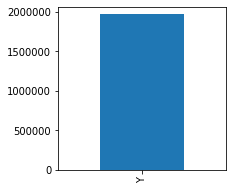

In [41]:
new_merchant_data['authorized_flag'].value_counts().plot(kind='bar', figsize=(3,3))

In [42]:
print("Number of unique card id in new_merchant_transaction", new_merchant_data['card_id'].nunique())
print("Number of unique city id in new merchant transaction", new_merchant_data['city_id'].nunique())
print("Number of unique merchant category id in new merchant transaction", new_merchant_data['merchant_category_id'].nunique())
print("Number of unique merchant id in new merchant transaction", new_merchant_data['merchant_id'].nunique())

Number of unique card id in new_merchant_transaction 290001
Number of unique city id in new merchant transaction 308
Number of unique merchant category id in new merchant transaction 314
Number of unique merchant id in new merchant transaction 226129


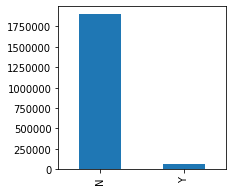

In [43]:
new_merchant_data['category_1'].value_counts(dropna=False).plot(kind='bar', figsize =(3,3))

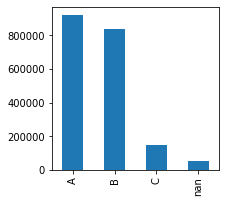

In [44]:
new_merchant_data['category_3'].value_counts(dropna=False).plot(kind='bar', figsize=(3,3))

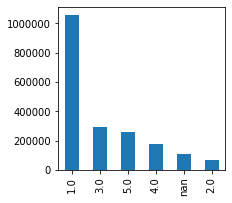

In [45]:
new_merchant_data['category_2'].value_counts(dropna=False).plot(kind='bar', figsize=(3,3))

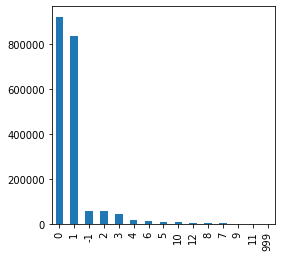

In [46]:
install_count = new_merchant_data['installments'].value_counts(dropna=False)
install_count.plot(kind='bar', figsize=(4,4))

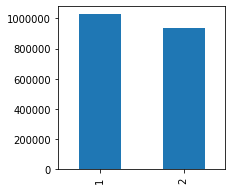

In [47]:
new_merchant_data['month_lag'].value_counts(dropna=False).plot(kind='bar', figsize=(3,3))

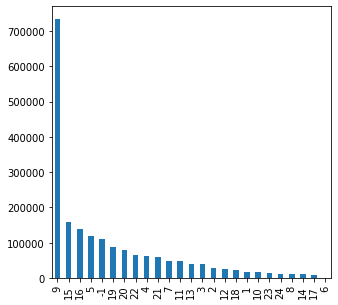

In [48]:
new_merchant_data['state_id'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))

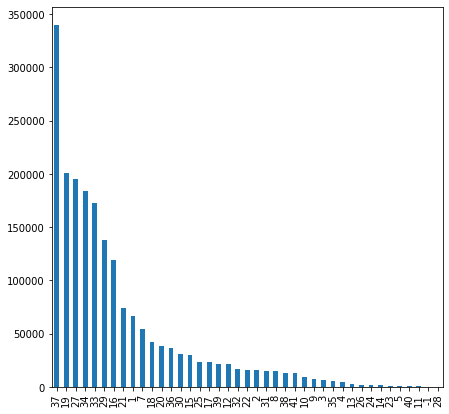

In [49]:
new_merchant_data['subsector_id'].value_counts(dropna=False).plot(kind='bar', figsize=(7,7))

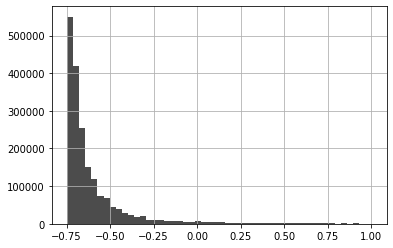

In [13]:
new_merchant_data['purchase_amount'].loc[new_merchant_data['purchase_amount'] < 1].hist(bins = 50, color=(0, 0, 0, 0.7))

(-2, 10)

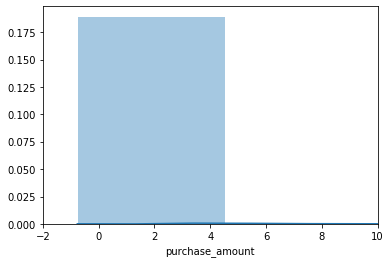

In [11]:
g = sns.distplot(new_merchant_data['purchase_amount'], hist=True, bins=50)
g.set_xlim(-2, 10)

In [20]:
temp1 = new_merchant_data['purchase_date'].str.split(" ", n = 1, expand = True)
temp2 = temp1[0].str.split("-",n=3, expand=True)
temp3 = temp1[1].str.split(":",n=2, expand=True)
new_merchant_data['purchase_month'] = temp2[1]
new_merchant_data['purchase_year'] = temp2[0]
new_merchant_data['purchase_day'] = temp2[2]
new_merchant_data['purchase_hour'] = temp3[0]
print(temp1.head())
print(temp2.head())
print(temp3.head())

            0         1
0  2018-03-11  14:57:36
1  2018-03-19  18:53:37
2  2018-04-26  14:08:44
3  2018-03-07  09:43:21
4  2018-03-22  21:07:53
      0   1   2
0  2018  03  11
1  2018  03  19
2  2018  04  26
3  2018  03  07
4  2018  03  22
    0   1   2
0  14  57  36
1  18  53  37
2  14  08  44
3  09  43  21
4  21  07  53


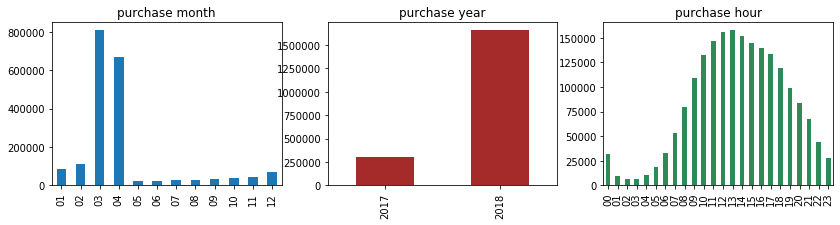

In [26]:
fig, ax = plt.subplots(1, 3, figsize = (14,2));
new_merchant_data['purchase_month'].value_counts().sort_index().plot(kind='bar', ax=ax[0], title='purchase month')
new_merchant_data['purchase_year'].value_counts().sort_index().plot(kind='bar', ax=ax[1], title='purchase year', color='brown')
new_merchant_data['purchase_hour'].value_counts().sort_index().plot(kind='bar', ax=ax[2], title='purchase hour', color='seagreen')

In [58]:
corr_matrix1 = new_merchant_data.corr()
print(corr_matrix1)
mask = np.zeros_like(corr_matrix1, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

                       city_id  installments  merchant_category_id  month_lag  \
city_id               1.000000     -0.053698             -0.043561  -0.000413   
installments         -0.053698      1.000000              0.053837  -0.005600   
merchant_category_id -0.043561      0.053837              1.000000  -0.003366   
month_lag            -0.000413     -0.005600             -0.003366   1.000000   
purchase_amount      -0.023166      0.206971              0.015988   0.001898   
category_2            0.079254     -0.001493             -0.022146   0.004448   
state_id              0.109207     -0.074535             -0.056976  -0.005599   
subsector_id          0.012631     -0.070943             -0.109032   0.004876   

                      purchase_amount  category_2  state_id  subsector_id  
city_id                     -0.023166    0.079254  0.109207      0.012631  
installments                 0.206971   -0.001493 -0.074535     -0.070943  
merchant_category_id         0.015988   -0

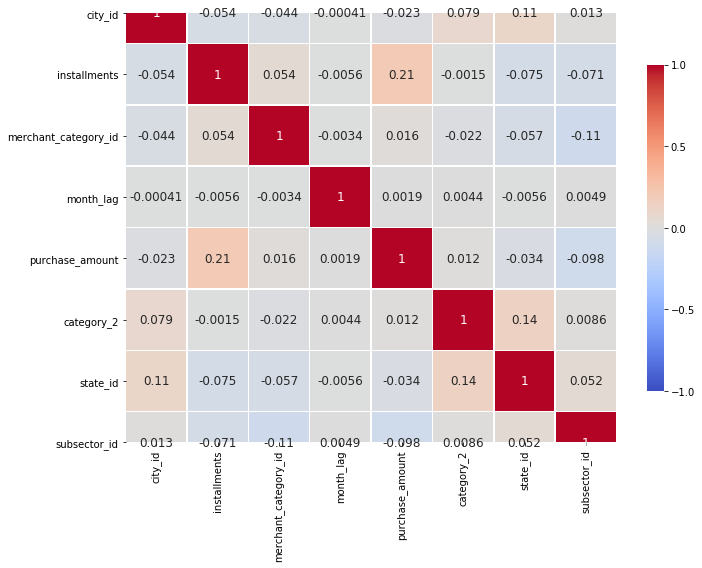

In [59]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix1, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix1.columns, rotation = 0)
ax.set_xticklabels(corr_matrix1.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# Historical Transaction Data

In [ ]:
historical = pd.read_csv("/kaggle/input/elo-merchant-category-recommendation/historical_transactions.csv")
historical.head(5)

In [ ]:
print("Number of rows and columns in historical_transaction", historical.shape)
historical.nunique()

In [ ]:
print("Number of null values in each column")
historical.isnull().sum()

In [ ]:
historical['authorized_flag'].value_counts()
historical['authorized_flag'].value_counts().plot(kind='bar', figsize=(3,3))

In [ ]:
print("Number of unique card id in historical_transaction", historical['card_id'].nunique())
print("Number of unique city id in historical transaction", historical['city_id'].nunique())
print("Number of unique merchant category id in historical transaction", historical['merchant_category_id'].nunique())
print("Number of unique merchant id in historical transaction", historical['merchant_id'].nunique())

In [ ]:
historical['category_1'].value_counts(dropna=False).plot(kind='bar', figsize =(3,3))
historical['category_3'].value_counts(dropna=False).plot(kind='bar', figsize=(3,3))
historical['category_2'].value_counts(dropna=False).plot(kind='bar', figsize=(3,3))

In [ ]:
install_count = historical['installments'].value_counts(dropna=False)
install_count.plot(kind='bar', figsize=(4,4))

In [ ]:
historical['month_lag'].value_counts(dropna=False).plot(kind='bar', figsize=(3,3))
historical['state_id'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))
historical['subsector_id'].value_counts(dropna=False).plot(kind='bar', figsize=(7,7))

In [ ]:
g = sns.distplot(historical['purchase_amount'], hist=True, bins=50)
g.set_xlim(-2, 30)

In [ ]:
historical['purchase_date'] = pd.to_datetime(historical['purchase_date'])

Date = pd.DataFrame()
Date['month'] = historical['purchase_date'].dt.month
Date['month'].value_counts().sort_index().plot(kind='bar')

In [ ]:
Date['year'] = historical['purchase_date'].dt.year
Date['year'].value_counts().sort_index().plot(kind='bar')

In [ ]:
Date['hour'] = historical['purchase_date'].dt.hour
Date['hour'].value_counts().sort_index().plot(kind='bar')

In [ ]:
corr_matrix = historical.corr()
print(corr_matrix)

In [ ]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})